In [38]:
import pandas as pd
import numpy as np
import json
import pickle
import pathlib
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
import inflect
# import contractions
# from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk import ngrams

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [39]:
with open("Select_intent.json", encoding="utf8") as f:
    selectJson = json.loads(f.read())
# with open("stop_words.json", encoding="utf8") as f:
#     stop_words = json.loads(f.read())

In [40]:
intentList = []
patternList = []
for intent in selectJson["intents"]:
    for pattern in intent["patterns"]:
        intentList.append(intent['tag'])
        patternList.append(pattern)

In [41]:
data = {'Pattern': patternList, 'Intent': intentList}
df = pd.DataFrame(data, columns = ['Pattern', 'Intent'])
# df

In [42]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize_text(words):
    # words = remove_non_ascii(words)
    words = to_lowercase(words)
    # words = remove_punctuation(words)
    # words = replace_numbers(words)
    # words = remove_stopwords(words)
    # words = stem_words(words)
    # words = lemmetize_verbs(words)
    return words
def remove_stopwords(text):
    word_list = text.split()
    text = ' '.join([x for x in word_list if x not in stop_words])
    return text

def pad(text):
    word_list = text.split()
    word_list.insert(0, "<start>")
    word_list.insert(len(word_list), "<end>")
    text = ' '.join([x for x in word_list if x not in stop_words])
    return text

def tokenize(text):
    return nltk.word_tokenize(text)

def text_prepare(text):
    # text = ' '.join([x for x in normalize_text(tokenize(text))])
    
    return re.sub(r'[^\w]', ' ', text).lower()

In [43]:
df['Cleaned Pattern'] = [text_prepare(x) for x in df['Pattern']]
le = LabelEncoder()
df['label'] = le.fit_transform(df['Intent'])
# df

In [44]:
# df['Query Length'] = [len(x.split()) for x in df['Cleaned Pattern']]
df

Pattern               Intent  \
0                          How many <OBJ> have <ATTR>    General Selection   
1   Which <OBJ> has <DESC> <ATTR> from <TEMPORAL> ...    General Selection   
2     How many <OBJ> have <ATTR> <DESC> <MEASUREMENT>    General Selection   
3   How many <OBJ> have <ATTR> less than <MEASUREM...    General Selection   
4   How many <OBJ> have <ATTR> less than <MEASUREM...    General Selection   
5                               How many <OBJ> <ATTR>    General Selection   
6          select all <OBJ> with <ATTR> <MEASUREMENT>    General Selection   
7                   select <OBJ> <ATTR> <MEASUREMENT>    General Selection   
8                all <OBJ> where <ATTR> <MEASUREMENT>    General Selection   
9           Number of <OBJ> with <ATTR> <MEASUREMENT>    General Selection   
10            What is the number of <OBJ> with <ATTR>    General Selection   
11                            Which <OBJ> have <ATTR>    General Selection   
12    What are <OBJ> with <ATTR> <DESC> <MEASUREMENT>    General Selection   
13                      Which <OBJ> has <DESC> <ATTR>    General Selection   
14  What is the number of <OBJ> that <ATTR> <MEASU...    General Selection   
15                 Number of <OBJ> with <DESC> <ATTR>    General Selection   
16                       how many <OBJ> <ATTR> <DESC>    General Selection   
17                          which <OBJ> <DESC> <ATTR>    General Selection   
18  what are the problems of <OBJ> that deliver <D...    General Selection   
19      No of <OBJ> that deliver <ATTR> <MEASUREMENT>    General Selection   
20          number of <OBJ> that <ATTR> <MEASUREMENT>    General Selection   
21                          How many <OBJ> are <ATTR>    General Selection   
22               which <OBJ> <DESC> <ATTR> <TEMPORAL>    General Selection   
23               what <OBJ> have <ATTR> <MEASUREMENT>    General Selection   
24  what is the number of <OBJ> with UPH <DESC> <M...    General Selection   
25     top <QUANTITY> <OBJ> with <ATTR> <MEASUREMENT>  Specified Selection   
26  Select <QUANTITY> <OBJ> with <ATTR> <MEASUREMENT>  Specified Selection   
27         <QUANTITY> <OBJ> with <ATTR> <MEASUREMENT>  Specified Selection   
28                              Best performing <OBJ>  Specified Selection   
29            <OBJ> with the <DESC> <ATTR> <TEMPORAL>  Specified Selection   
30                       <OBJ> with the <DESC> <ATTR>  Specified Selection   
31                     <QUANTITY> <DESC> <ATTR> <OBJ>  Specified Selection   
32     <QUANTITY> <OBJ> with <DESC> <ATTR> <TEMPORAL>  Specified Selection   
33                            <DESC> performing <OBJ>  Specified Selection   
34   which <OBJ> produce the <DESC> <ATTR> <TEMPORAL>  Specified Selection   
35               choose <QUANTITY> with <DESC> <ATTR>  Specified Selection   
36               select <QUANTITY> with <DESC> <ATTR>  Specified Selection   
37                            <DESC> <OBJ> <TEMPORAL>  Specified Selection   
38       <QUANTITY> <OBJ> <ATTR> <DESC> <MEASUREMENT>  Specified Selection   

                                      Cleaned Pattern  label  
0                          how many  obj  have  attr       0  
1   which  obj  has  desc   attr  from  temporal  ...      0  
2     how many  obj  have  attr   desc   measurement       0  
3   how many  obj  have  attr  less than  measurem...      0  
4   how many  obj  have  attr  less than  measurem...      0  
5                               how many  obj   attr       0  
6          select all  obj  with  attr   measurement       0  
7                   select  obj   attr   measurement       0  
8                all  obj  where  attr   measurement       0  
9           number of  obj  with  attr   measurement       0  
10            what is the number of  obj  with  attr       0  
11                            which  obj  have  attr       0  
12    what are  obj  with  attr   desc   measurement       0  
13                      which  obj  has  de

# One gram

In [45]:
# Get vocab list

wordfreq = {}
for index in df.index:
    tokens = nltk.word_tokenize(df['Cleaned Pattern'][index])
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

print(len(wordfreq.keys())) # 59 unique unigrams
# for w in wordfreq.keys():
#     print(w, wordfreq[w])

36


In [46]:
# BoW for each training sample

query_vectors = []
for index in df.index:
    query_tokens = nltk.word_tokenize(df['Cleaned Pattern'][index])
    query_vec = []
    for token in wordfreq:
        if token in query_tokens:
            query_vec.append(1)
        else:
            query_vec.append(0)
    query_vectors.append(query_vec)

one_gram_vocab = [x for x in wordfreq.keys()]
# one_gram_vocab
# for q in query_vectors:
#     print(q)

# for q in query_vectors:
#     print(q)

In [47]:
pickle.dump(one_gram_vocab, open('select_unigrams.pkl', 'wb'))

In [48]:
n = 0

onegram = pd.DataFrame()
for t in wordfreq.keys():
    words = []
    for q in query_vectors:
        words.append(q[n])
    n = n+1
    onegram[t] = words
# onegram

In [49]:
# append label with BoW
pd.set_option('display.max_rows', None)
onegram['label'] = [x for x in df['label']]
# onegram

In [50]:
# split one gram to feature and label

X_1 = onegram.iloc[:, 0:-1]
y_1 = onegram.iloc[:, -1:]

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[3.80434797e-02 2.79763131e-02 1.33013273e-02 1.82927579e-02
 7.82853730e-02 4.11436848e-02 1.22675337e-02 3.42197756e-02
 2.89226004e-03 1.59011819e-02 1.92673066e-03 2.37412428e-02
 1.41758640e-03 3.16301387e-04 4.15083488e-04 7.47196774e-03
 2.69452524e-02 6.46933928e-02 2.82263109e-03 4.04580849e-02
 7.27135668e-02 3.43702453e-02 5.33500621e-03 6.95744202e-02
 2.02288739e-02 8.34089851e-03 1.47478992e-04 2.15764404e-03
 8.14060624e-04 8.35714286e-04 5.35906683e-03 2.43704219e-01
 1.79931474e-02 3.74292534e-02 2.69177209e-02 1.54672244e-03]


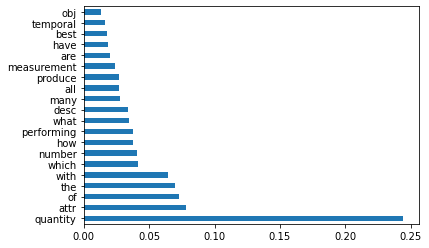

In [51]:

model = ExtraTreesClassifier()
model.fit(X_1,y_1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [52]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_1, y_1)

In [53]:
model1 = ExtraTreesClassifier()
model1.fit(x1_train, y1_train)
model1.score(x1_test, y1_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0

In [54]:
with open('select_model1gram.pkl','wb') as f:
    pickle.dump(model1,f)

# 2 gram

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count_two_vect = CountVectorizer(ngram_range=(2,2))
# count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
X_train_two_counts = count_two_vect.fit_transform(df['Cleaned Pattern'])
two_gram_vocab = count_two_vect.get_feature_names()
# two_gram_vocab

In [56]:
def get_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

In [57]:
# Bow 2grams 

query_2_vectors = []
for index in df.index:
    n = 2
    twograms = get_ngrams(df['Cleaned Pattern'][index], n)
    # print(twograms)
    # for x in twograms:
    #     print(x)
    query_2_vec = []
    for t in two_gram_vocab:
        if t in twograms:
            query_2_vec.append(1)
        else:
            query_2_vec.append(0)
    query_2_vectors.append(query_2_vec)

In [58]:
pickle.dump(two_gram_vocab, open('select_bigrams.pkl', 'wb'))

In [59]:
n = 0

twogram = pd.DataFrame()
for t in two_gram_vocab:
    words = []
    for q in query_2_vectors:
        words.append(q[n])
    n = n+1
    twogram[t] = words

# twogram.columns

In [60]:
twogram['label'] = [x for x in df['label']]

In [61]:
X_2 = twogram.iloc[:, 0:-1]
y_2 = twogram.iloc[:, -1:]


ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[1.57298966e-02 4.77551020e-04 5.52231967e-03 9.55102041e-04
 8.33459726e-03 1.32930004e-03 2.99795918e-04 2.34088191e-02
 2.37787045e-02 1.61343537e-03 1.68971182e-02 1.40870664e-02
 6.51846234e-03 0.00000000e+00 1.91020408e-04 1.58268787e-02
 4.77091837e-03 2.08746697e-02 1.36714688e-02 0.00000000e+00
 8.32614730e-03 1.32034199e-02 4.26776249e-02 4.62192318e-03
 2.06818182e-04 2.69615348e-02 0.00000000e+00 0.00000000e+00
 9.91482277e-04 2.95549639e-02 2.01190476e-04 9.08200000e-03
 1.51087668e-02 6.73087571e-03 2.80280897e-02 9.12517674e-03
 2.23773431e-02 1.02460230e-02 5.77871668e-03 2.03573445e-02
 6.02230196e-02 1.66945887e-03 0.00000000e+00 5.61679951e-02
 3.11111111e-04 9.88260718e-03 1.70135691e-02 1.43478689e-01
 3.81279875e-02 7.92609153e-03 9.48306923e-03 2.79385100e-02
 7.23180272e-04 1.10204082e-04

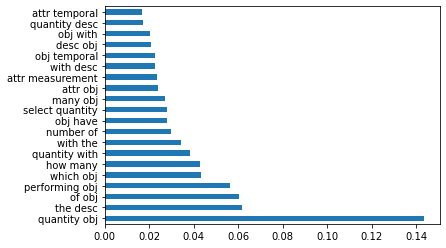

In [62]:

model2 = ExtraTreesClassifier()
model2.fit(X_2,y_2)
print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model2.feature_importances_, index=X_2.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [65]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X_2, y_2)

In [66]:
model2 = ExtraTreesClassifier()
model2.fit(x2_train, y2_train)
model2.score(x2_test, y2_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0

In [67]:
with open('select_model2gram.pkl','wb') as f:
    pickle.dump(model2,f)

# 1-2 grams

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
# count_onetwo_vect = CountVectorizer(ngram_range=(1,2))
X_train_onetwo_counts = count_onetwo_vect.fit_transform(df['Cleaned Pattern'])
onetwo_gram_vocab = count_onetwo_vect.get_feature_names()
# onetwo_gram_vocab

In [69]:
onetwogram = pd.DataFrame()

In [70]:
onecol = X_1.columns
for o in onecol:
    onetwogram[o] = X_1[o].values

In [71]:
twocol = X_2.columns
for o in twocol:
    onetwogram[o] = X_2[o].values

[1.95253721e-02 1.58396625e-02 6.07109981e-03 1.14250498e-02
 3.49106718e-02 2.53765621e-02 1.12501611e-03 1.85189993e-02
 4.72727273e-04 7.63555784e-03 5.06493506e-04 1.66314294e-02
 0.00000000e+00 9.94897959e-06 5.57142857e-05 1.66094620e-03
 1.02148372e-02 2.51405320e-02 1.23102041e-03 2.02664072e-02
 3.41711690e-02 1.80568755e-02 3.34285714e-04 1.95365988e-02
 4.01587590e-03 2.55155220e-03 0.00000000e+00 4.64285714e-05
 0.00000000e+00 7.42857143e-04 1.70894882e-03 1.48656594e-01
 4.20052238e-03 2.54129215e-02 1.34514363e-02 7.66734694e-04
 1.04895144e-02 0.00000000e+00 4.94799938e-03 1.18857143e-03
 4.34301390e-03 1.47224435e-03 0.00000000e+00 1.09248210e-02
 1.28460630e-02 1.95000000e-04 4.81695303e-03 9.26048236e-03
 2.16404246e-03 3.71428571e-05 0.00000000e+00 6.98613482e-03
 5.00616880e-03 1.12595909e-02 9.68354151e-03 1.28311688e-04
 5.05226345e-03 9.48032710e-03 1.49649321e-02 5.94285714e-04
 5.73061224e-04 2.30735750e-02 1.85714286e-04 0.00000000e+00
 1.85714286e-04 1.323507

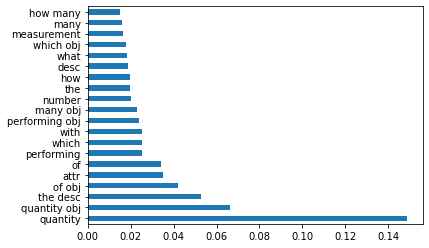

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(onetwogram, y_2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=onetwogram.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [75]:
x12_train, x12_test, y12_train, y12_test = train_test_split(onetwogram.iloc[:,:-1], onetwogram.iloc[:,-1:])

In [76]:
model12 = ExtraTreesClassifier()
model12.fit(x12_train, y12_train)
model12.score(x12_test, y12_test)

ipykernel_launcher:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0